In [22]:
import os
import sys
import json
import numpy as np
import pandas as pd
from quickstats.components import AnalysisBase
from quickstats.maths.numerics import str_encode_value
from quickstats.utils.common_utils import execute_multi_tasks

In [11]:
fname = "/eos/user/c/colm/hh4b/weird_sigma_at_diff_kl/roowksp_param_stat_jul27_full_ggfvbf_samps_ggf_and_vbf_pd_ggf_161718_vbf_inc161718.root"

In [31]:
klambda_values = np.arange(-5, 12.1, 0.2)
outdir = "significance_outputs"
if not os.path.exists(outdir):
    os.makedirs(outdir)

In [32]:
def compute_significance(klambda:float):
    sys.stdout.write(f"INFO: Evaluating significance for klambda = {klambda:.2f}\n")
    analysis = AnalysisBase(fname, data_name="obsData", poi_name="mu_HH",
                            config={"fix_param": f"mu_HH_VBF=1,mu_HH_ggF=1,klambda={klambda}"},
                            verbosity="WARNING")
    klambda_str = str_encode_value(round(klambda, 2))
    # I need to use a custom asimov name because your original workspace already has a
    # dataset named asimovData_1_NP_Nominal which will prevent new dataset from overwriting it
    analysis.generate_standard_asimov(asimov_types=[-2], asimov_names=[f"asimovData_1_NP_Nominal_{klambda_str}"])
    analysis.set_data(f"asimovData_1_NP_Nominal_{klambda_str}")
    result = analysis.nll_fit(poi_val=0, mode=0)
    savepath = os.path.join(outdir, f"klambda_{klambda_str}_asimovData_1_NP_Nominal_mu_0.json")
    with open(savepath, "w") as outfile:
        json.dump(result, outfile, indent=2)

In [33]:
_ = execute_multi_tasks(compute_significance, klambda_values, parallel=-1)

INFO: Evaluating significance for klambda = -5.00
INFO: Evaluating significance for klambda = -4.80
INFO: Evaluating significance for klambda = -4.60
INFO: Evaluating significance for klambda = -4.00
INFO: Evaluating significance for klambda = -3.80
INFO: Evaluating significance for klambda = -4.40
INFO: Evaluating significance for klambda = -3.40
INFO: Evaluating significance for klambda = -3.60
INFO: Evaluating significance for klambda = -2.60
INFO: Evaluating significance for klambda = -4.20
INFO: Evaluating significance for klambda = -2.20
INFO: Evaluating significance for klambda = -2.00
INFO: Evaluating significance for klambda = -2.40
INFO: Evaluating significance for klambda = -3.00
INFO: Evaluating significance for klambda = -3.20
INFO: Evaluating significance for klambda = -2.80
INFO: Evaluating significance for klambda = -1.80
INFO: Evaluating significance for klambda = -1.60
INFO: Evaluating significance for klambda = -1.40
INFO: Evaluating significance for klambda = -1.20


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [34]:
result = {"klambda": [], "significance": []}
for klambda in klambda_values:
    path = os.path.join(outdir, f"klambda_{str_encode_value(round(klambda, 2))}_asimovData_1_NP_Nominal_mu_0.json")
    data = json.load(open(path))
    result["klambda"].append(klambda)
    result["significance"].append(data["significance"])
df = pd.DataFrame(result)    

<AxesSubplot:xlabel='$\\mathrm{\\kappa_{\\lambda}}$', ylabel='Significance [$\\sigma$]'>

<Figure size 432x288 with 0 Axes>

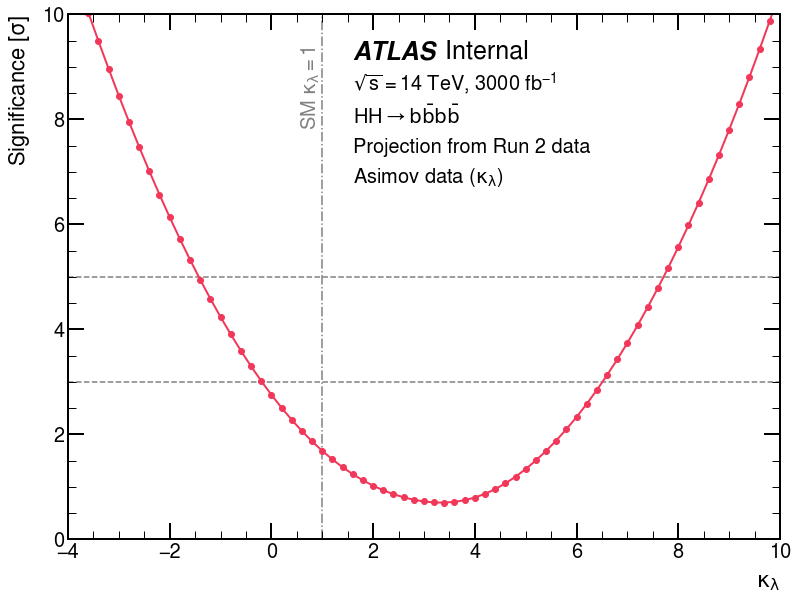

In [45]:
from quickstats.plots import Likelihood1DPlot
analysis_label_options = {
    'status': 'int',
    'energy': '14 TeV',
    'lumi': '3000 fb$^{-1}$',
    'loc': (0.4, 0.95),
    'fontsize': 25,
    'extra_text': r"$HH \rightarrow \mathrm{b\bar{b}b\bar{b}}$//Projection from Run 2 data"
                  r"//Asimov data ($\mathrm{\kappa_{\lambda}}$)"
}
styles = {'legend': {'fontsize': 15}}
config = {
    'sigma_values': (3, 5),
    'sigma_names': None,
    'sigma_line_styles':{
        'color': 'gray',
        'linestyle': '--'
    },
    'sm_values': (1,),
    'sm_names': (r"SM $\mathrm{\kappa_{\lambda}} = 1$",),
    'sm_pos': 0.78,
    'sm_line_styles':{
        'color': 'gray',
        'linestyle': 'dashdot'
    }
}
styles_map = {"color": "hh:darkpink", "marker": "o"}

plotter = Likelihood1DPlot(df, styles_map=styles_map, styles=styles,
                           analysis_label_options=analysis_label_options,
                           config=config)
plotter.draw(xattrib='klambda',
             yattrib='significance',
             xlabel=r"$\mathrm{\kappa_{\lambda}}$",
             ylabel="Significance [$\sigma$]",
             ymax=10, xmin=-4, xmax=10,
             draw_sigma_line=True, draw_sm_line=True)